Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

Loading Data

In [2]:
# Use loadmat to load matlab files
mat=loadmat('ex3/ex3data1.mat')

# mat is a dict with key "X" for x-values, and key "y" for y values
X=mat["X"]
y=mat["y"]

Visualizing the Digits

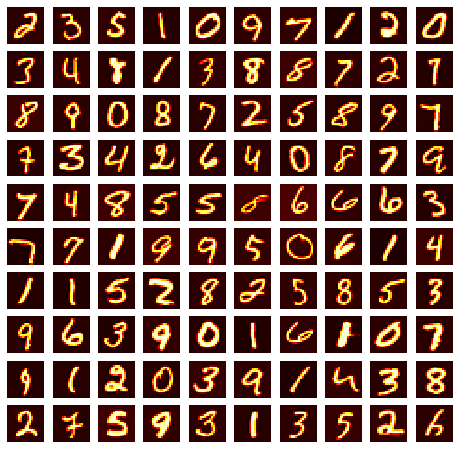

In [3]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot") #reshape to 20*20 pixels
        axis[i,j].axis("off")

Computing Cost Function

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
def CostFuncReg(theta, X, y, lambda1):
    m = len(y)
    t1 = -(y * np.log(sigmoid(X @ theta)))
    t2 = -(1-y)*(np.log(1 - sigmoid(X @ theta)))
    t3 = lambda1/(2*m) * sum(theta[1:]**2)
    cost = sum(t1+t2)/m
    regcost = cost + t3
    j_0 = 1/m * (X.transpose() @ (sigmoid(X @ theta) - y))[0]
    j_1 = 1/m * (X.transpose() @ (sigmoid(X @ theta) - y))[1:] + (lambda1/m) * theta[1:]
    grad = np.vstack((j_0[:, np.newaxis], j_1))
    return regcost[0], grad

In [6]:
def gradientdescent(X, y, theta, alpha, num_iters, lambda1):
    m = len(y)
    J_hist = []
    
    for i in range(num_iters):
        cost, grad = CostFuncReg(theta, X, y, lambda1)
        theta = theta - (alpha*grad)
        J_hist.append(cost)
    
    return theta, J_hist

In [7]:
def onevsall(X,y, num_labels, lambda1):
    m,n = X.shape[0], X.shape[1]
    in_theta = np.zeros((n+1,1))
    all_theta = []
    all_J = []
    X = np.hstack((np.ones((m,1)),X))
    for i in range(1,num_labels+1):
        fake_ds = np.where(y==i, 1, 0)
        theta, J_hist = gradientdescent(X, fake_ds, in_theta, 1, 300, lambda1)
        all_theta.extend(theta)
        all_J.extend(J_hist)
    return np.array(all_theta).reshape(num_labels, n+1), all_J

In [8]:
all_theta, all_J = onevsall(X, y, 10, 0.1)

Plotting the Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

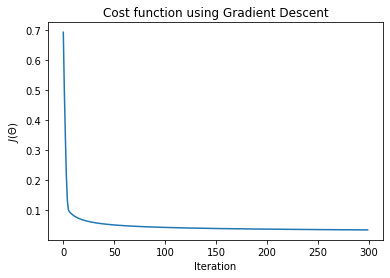

In [9]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

One vs All Prediction

In [10]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label
    
    return a vector of prediction
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    predictions = X @ all_theta.T
    return np.argmax(predictions,axis=1)+1

In [11]:
pred = predictOneVsAll(all_theta, X)

In [12]:
pred

array([10, 10, 10, ...,  9,  9,  7], dtype=int64)

In [13]:
pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 91.46 %


Rough

In [14]:
all_theta.shape

(10, 401)

In [15]:
Xt = np.hstack((np.ones((X.shape[0],1)),X))

In [18]:
a = Xt[31].reshape(1,401) @ all_theta.T

In [19]:
a

array([[-18.54254465,  -4.63382225, -11.32597982, -13.0752544 ,
         -7.17083437,  -6.06390182, -14.20214382,  -4.01162503,
        -15.14692309,   6.41310538]])

In [21]:
np.argmax(a) + 1

10

In [22]:
y[32]

array([10], dtype=uint8)

In [23]:
pred.shape

(5000,)

In [24]:
sum(pred[:, np.newaxis] == y)

array([4573])